# Коршунова Полина Юрьевна НММбд-01-22

In [6]:
from PIL import Image

image_path = "/Users/polinakorshunova/Desktop/cute.JPG"

image = Image.open(image_path)

print(f"Формат изображения: {image.format}")
print(f"Размер изображения: {image.size}")
print(f"Режим изображения: {image.mode}")

image.show()

Формат изображения: JPEG
Размер изображения: (622, 715)
Режим изображения: RGB


In [9]:
from PIL import Image
import numpy as np

image_path = "/Users/polinakorshunova/Desktop/cute.JPG"

img = Image.open(image_path)

x = np.array(img, dtype=np.float32)

print(f"Размер numpy массива: {x.shape}")

Размер numpy массива: (715, 622, 3)


In [16]:
from PIL import Image
import numpy as np

image_path = "/Users/polinakorshunova/Desktop/cute.JPG"

img = Image.open(image_path)

r, g, b = img.split()

R = np.array(r, dtype=np.float32)
G = np.array(g, dtype=np.float32)
B = np.array(b, dtype=np.float32)

Ur, Sr, Vr = np.linalg.svd(R, full_matrices=False)
Ug, Sg, Vg = np.linalg.svd(G, full_matrices=False)
Ub, Sb, Vb = np.linalg.svd(B, full_matrices=False)

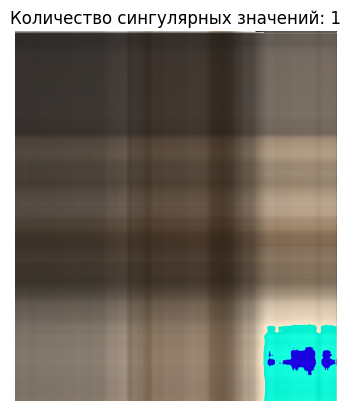

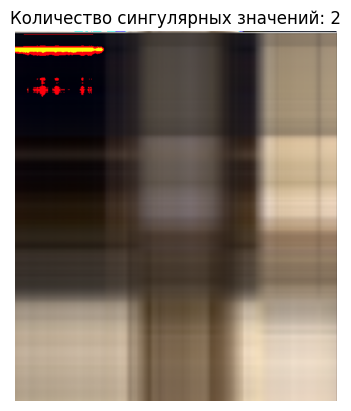

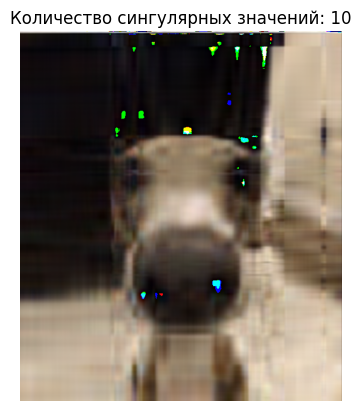

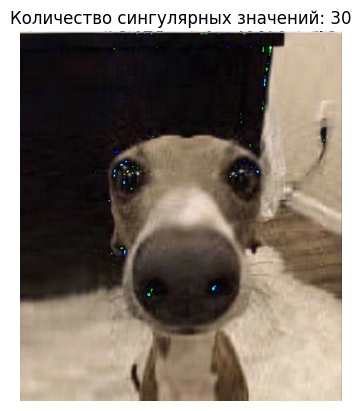

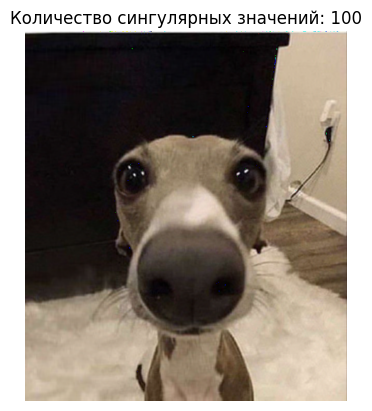

In [18]:
import matplotlib.pyplot as plt

num_singular_values = [1, 2, 10, 30, 100]

for k in num_singular_values:
    reconstructed_R = np.dot(Ur[:, :k], np.dot(np.diag(Sr[:k]), Vr[:k, :]))
    reconstructed_G = np.dot(Ug[:, :k], np.dot(np.diag(Sg[:k]), Vg[:k, :]))
    reconstructed_B = np.dot(Ub[:, :k], np.dot(np.diag(Sb[:k]), Vb[:k, :]))

    reconstructed_image = np.stack([reconstructed_R, reconstructed_G, reconstructed_B], axis=-1).astype(np.uint8)
    
    plt.figure()
    plt.imshow(reconstructed_image)
    plt.title(f"Количество сингулярных значений: {k}")
    plt.axis('off')
    plt.show()

In [25]:
original_size = sum(img_np.ravel().nbytes for img_np in [R, G, B])

compressed_sizes = []
for k in num_singular_values:
    compressed_size = sum(matrix.nbytes for matrix in [Ur[:,:k] , np.diag(Sr[:k]), Vr[:k,:],
                                                       Ug[:,:k] , np.diag(Sg[:k]), Vg[:k,:],
                                                       Ub[:,:k] , np.diag(Sb[:k]), Vb[:k,:]])
    compressed_sizes.append(compressed_size)

for i, k in enumerate(num_singular_values):
    print(f"Размер сжатого изображения для {k} сингулярных значений: {compressed_sizes[i]} байт")

print(f"Размер исходного изображения: {original_size} байт")

Размер сжатого изображения для 1 сингулярных значений: 16056 байт
Размер сжатого изображения для 2 сингулярных значений: 32136 байт
Размер сжатого изображения для 10 сингулярных значений: 161640 байт
Размер сжатого изображения для 30 сингулярных значений: 492120 байт
Размер сжатого изображения для 100 сингулярных значений: 1724400 байт
Размер исходного изображения: 5336760 байт
